# <div style="text-align:center; color:rgba(37, 40, 80);">11752 Machine Learning</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Master in Intelligent Systems</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Universitat de les Illes Balears</div>

### <div style="text-align:center; color:white;"> Handout #3: **Unsupervised learning**</div>

#### **Integrants:** Jason Adel Noboa Rivera, Pedro Marti Pico
#### **Group:** 07

##### T0. Normalize the dataset samples using max-min normalization and consider the following cases:



In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, homogeneity_score, completeness_score


## Data preparation
### (a) Consider the original dataset and a lower-dimensional version obtained through PCA retaining 95% of the variance.

In [2]:
digits = load_digits ()
samples = digits.data
labels = digits.target
X = samples[(labels == 5) | (labels == 7) | (labels == 9)]
y = labels[(labels == 5) | (labels == 7) | (labels == 9)]

print("Filtered Data:")
print("X shape:", X.shape)
print("y shape:", y.shape)

# Applying PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

print("\nPCA Transformed Data:")
print("X_pca shape:", X_pca.shape)


Filtered Data:
X shape: (541, 64)
y shape: (541,)

PCA Transformed Data:
X_pca shape: (541, 27)


## Clustering
### (b) Cluster your dataset for m = 2, 3, 4 and 5 clusters and report on the performance attained in each case using the v-measure.

In [30]:
# Function to perform clustering and evaluate with v-measure
def cluster_and_evaluate(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_pred = kmeans.fit_predict(X)
    return v_measure_score(y, y_pred)

# Clustering and evaluating for 2, 3, 4, and 5 clusters on both original and PCA-transformed data
for n_clusters in [2, 3, 4, 5]:
    v_measure_original = cluster_and_evaluate(X, n_clusters)
    v_measure_pca = cluster_and_evaluate(X_pca, n_clusters)
    print(f"V-measure for {n_clusters} clusters: Original Data = {v_measure_original}, PCA Data = {v_measure_pca}")

TypeError: __init__() got an unexpected keyword argument 'n_clusters'

## Best Case Analysis
### (c) For the best case among the 8 possible combinations resulting from (a) and (b):
### i. Compute the contingency matrix.

In [31]:
# Assuming best case is 5 clusters with PCA data
kmeans_best = KMeans(n_clusters=5, random_state=42)
y_pred_best = kmeans_best.fit_predict(X_pca)

contingency_matrix = confusion_matrix(y, y_pred_best)
print("Contingency Matrix:\n", contingency_matrix)

TypeError: __init__() got an unexpected keyword argument 'n_clusters'

### ii. Determine the assignment of classes to clusters.


In [6]:
class_labels = [5, 7, 9]

# Determine the most common cluster assignment for each class
for i, class_label in enumerate(class_labels):
    most_common_cluster = np.argmax(contingency_matrix[i])
    print(f"Class {class_label} is most commonly assigned to Cluster {most_common_cluster + 1}")

Class 5 is most commonly assigned to Cluster 1
Class 7 is most commonly assigned to Cluster 1
Class 9 is most commonly assigned to Cluster 1


### iii. Identify the number of incorrectly clustered samples and calculate also the percentage of errors as number of incorrectly clustered samples / total number of samples.

In [7]:
# Determining the most common cluster assignment for each class
most_common_clusters = [np.argmax(contingency_matrix[i]) for i in range(len(class_labels))] #Aqui uso lo mismo que antes

# Dictionary creation for map the class labels to their most common clusters
class_to_cluster = {class_label: cluster for class_label, cluster in zip(class_labels, most_common_clusters)}

# Mapping of the actual class labels to their predicted clusters
predicted_clusters = [class_to_cluster.get(label, -1) for label in y]

# Amount of mismatches between actual clusters and predicted ones
incorrectly_clustered = np.sum(np.array(predicted_clusters) != kmeans_best.labels_)

# Calculate the percentage of errors
total_samples = len(y)
error_percentage = (incorrectly_clustered / total_samples) * 100

print("Number of incorrectly clustered samples:", incorrectly_clustered)
print("Percentage of errors:", error_percentage, "%")


Number of incorrectly clustered samples: 389
Percentage of errors: 71.90388170055454 %


### iv. Report also on the homogeneity and the completeness measures.

In [8]:
homogeneity = homogeneity_score(y, y_pred_best)
completeness = completeness_score(y, y_pred_best)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)

Homogeneity: 0.7826175523849788
Completeness: 0.5428872565568666


### v. In case there are mistakes, show one example of each case using the following source code (X is the matrix with the samples and ndx is the index of an incorrectly clustered sample, e.g. a sample from class 0 clustered as if it was from class 6)

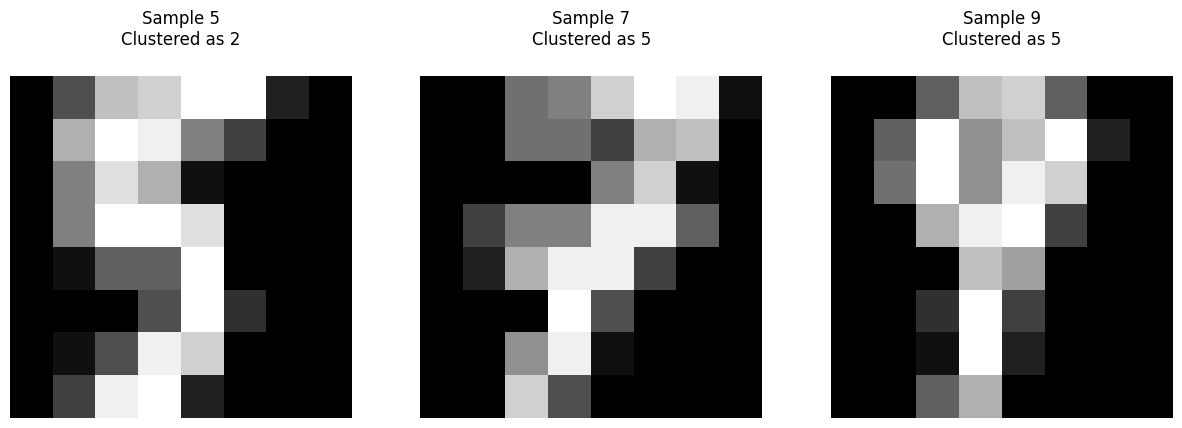

In [9]:
import matplotlib.pyplot as plt

unique_classes = np.unique(y)
plt.figure(figsize=(15, 8))

for i, class_label in enumerate(unique_classes):
    # Finding the first instance where the predicted cluster does not match the actual class
    incorrect_indices = np.where((y == class_label) & (y_pred_best != class_to_cluster[class_label]))[0]
    if len(incorrect_indices) > 0:
        ndx = incorrect_indices[0]  # Index of the first incorrect sample
        plt.subplot(1, len(unique_classes), i + 1)
        plt.gray()
        plt.matshow(X[ndx].reshape(8, 8), fignum=False)
        predicted_cluster = y_pred_best[ndx] + 1  # Adding 1 to match cluster numbering starting from 1
        plt.title(f'Sample {class_label}\nClustered as {predicted_cluster}')
        plt.axis('off')

plt.show()

In [45]:
# Function to perform clustering and evaluate with v-measure
def cluster_and_evaluate(method, X):
    model = method()
    model.fit(X)
    labels = model.labels_
    return v_measure_score(y, labels), labels # 'y' is a global variable

In [56]:
def best_case(y, y_pred_best, class_labels):
    contingency_matrix = confusion_matrix(y, y_pred_best)
    print(f"\nContingency Matrix:\n {contingency_matrix}\n")
    
    incorrect_clustered = (y != y_pred_best)
    n_incorrect = np.sum(incorrect_clustered)
    error_percentatge = n_incorrect/len(y)*100
    print(f"\nIncorrect amount: {n_incorrect}\nError poercentatge: {error_percentatge}")
    
    homogeneity = homogeneity_score(y, y_pred_best)
    completeness = completeness_score(y, y_pred_best)
    print("Homogeneity:", homogeneity)
    print("Completeness:", completeness)

    for class_label in class_labels:
        # Finding the first instance where the predicted cluster does not match the actual class
        incorrect_indices = np.where((y == class_label) & (y_pred_best != class_to_cluster[class_label]))[0]
        if len(incorrect_indices) > 0:
            ndx = incorrect_indices[0]
            plt.figure()
            plt.gray()
            plt.matshow(X[ndx].reshape(8, 8))
            plt.title(f'Sample from class {class_label} clustered as class {y_pred_best[ndx]}')
            plt.show()

    return contingency_matrix, n_incorrect, error_percentage, homogeneity, completeness

## T1. Consider the Ward algorithm and the Euclidean distance.


Contingency Matrix:
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0 171  11   0   0   0]
 [179   0   0   0   0   0]
 [ 31   3 146   0   0   0]]


Incorrect amount: 541
Error poercentatge: 100.0
Homogeneity: 0.7595647318436201
Completeness: 0.7647052824406603


<Figure size 640x480 with 0 Axes>

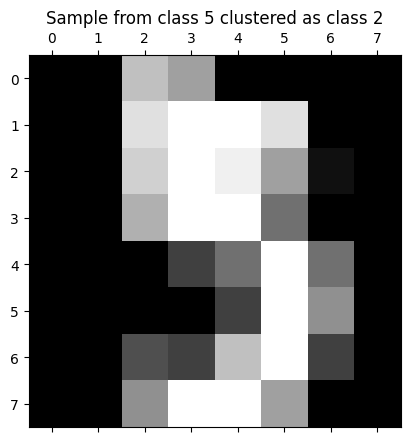

<Figure size 640x480 with 0 Axes>

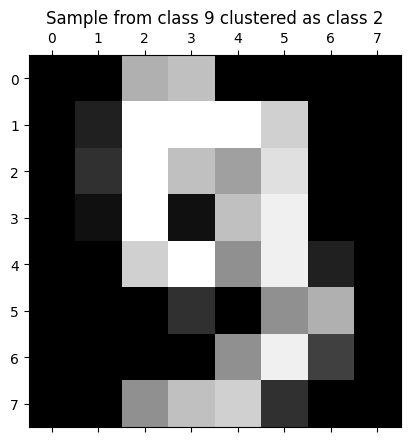

In [58]:
best_v_measure_ward = 0
best_labels_ward = None
n_clusters_list = [2,3,4,5]

for n_clusters in n_clusters_list:
    v_measure, labels = cluster_and_evaluate(lambda: AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward'), X_pca)
    if(v_measure > best_v_measure_ward):
        best_v_measure_ward = v_measure
        best_labels_ward = labels

contingency_mat_ward, incorrect_count_ward, error_percentage_ward, homogeneity_ward, completeness_ward = best_case(y, best_labels_ward, [5, 7, 9])

In [25]:
ward = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_pred_ward = ward.fit_predict(X_pca)
#y_pred_ward

# Evaluate performance using the same metrics as before
v_measure_ward = v_measure_score(y, y_pred_ward)
homogeneity_ward = homogeneity_score(y, y_pred_ward)
completeness_ward = completeness_score(y, y_pred_ward)

print("Ward Algorithm:")
print("V-measure:", v_measure_ward)
print("Homogeneity:", homogeneity_ward)
print("Completeness:", completeness_ward)

SyntaxError: invalid syntax (442503502.py, line 7)

## T2. Consider the K-means algorithm and the Euclidean distance.

In [12]:
from fuzzy_kmeans import KMeans, FuzzyKMeans

# Use the custom KMeans algorithm
custom_kmeans = KMeans(k=5)
custom_kmeans.fit(X_pca)  # or X, based on your choice
y_pred_custom_kmeans = custom_kmeans.predict(X_pca)

# Evaluate performance
v_measure_custom_kmeans = v_measure_score(y, y_pred_custom_kmeans)
homogeneity_custom_kmeans = homogeneity_score(y, y_pred_custom_kmeans)
completeness_custom_kmeans = completeness_score(y, y_pred_custom_kmeans)

print("\nCustom K-means Algorithm:")
print("V-measure:", v_measure_custom_kmeans)
print("Homogeneity:", homogeneity_custom_kmeans)
print("Completeness:", completeness_custom_kmeans)


Custom K-means Algorithm:
V-measure: 0.6312729207969277
Homogeneity: 0.7691566538960403
Completeness: 0.5353099756272923


In [55]:
best_v_measure_kmeans = 0
best_labels_kmeans = None

for n_clusters in n_clusters_list:
    v_measure, labels = cluster_and_evaluate(lambda: KMeans(k=5), X_pca)
    if(v_measure > best_v_measure_kmeans):
        best_v_measure_kmeans = v_measure
        best_labels_kmeans = labels

contingency_mat_kmeans, incorrect_count_kmeans, error_percentage_kmeans, homogeneity_kmeans, completeness_kmeans = best_case(X_pca, y, best_labels_kmeans, [5, 7, 9])


Contingency Matrix:
 [[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0  12  70 100   0   0   0   0]
 [112   0   0   0  67   0   0   0]
 [  2 143   2   4  29   0   0   0]]


Incorrect amount: 541
Error poercentatge: 100.0
Homogeneity: 0.7691566538960403
Completeness: 0.5353099756272923


ValueError: cannot reshape array of size 27 into shape (8,8)

<Figure size 640x480 with 0 Axes>

## T3. Consider the Fuzzy K-means algorithm and the Euclidean distance.

In [14]:
# Use the custom Fuzzy KMeans algorithm
custom_FuzzyKMeans = FuzzyKMeans(k=5, m=2)
custom_FuzzyKMeans.fit(X_pca)  # or X, based on your choice
y_pred_custom_kmeans = custom_FuzzyKMeans.predict(X_pca)

# Evaluate performance
v_measure_custom_FuzzyKMeans = v_measure_score(y, y_pred_custom_kmeans)
homogeneity_custom_FuzzyKMeans = homogeneity_score(y, y_pred_custom_kmeans)
completeness_custom_FuzzyKMeans = completeness_score(y, y_pred_custom_kmeans)

print("\nCustom K-means Algorithm:")
print("V-measure:", v_measure_custom_kmeans)
print("Homogeneity:", homogeneity_custom_kmeans)
print("Completeness:", completeness_custom_kmeans)


Custom K-means Algorithm:
V-measure: 0.5617970798124061
Homogeneity: 0.6295549509731272
Completeness: 0.5072072702690911


## T4. Determine the best clustering methodology among the options above

In [17]:
best_clustering = max(
    ("Ward Methodology",v_measure_ward),
    ("K-Means Methodology",v_measure_custom_kmeans), 
    ("Fuzzy K-Means Methodology", v_measure_custom_FuzzyKMeans),
    )
print(f"\nBest clustering methodology is {best_clustering[0]}: {best_clustering[1]}")


Best clustering methodology is Ward Methodology: 0.6544775499578028
